Data Understanding

Import Libraries

In [ ]:
#!pip install pandas numpy scipy scikit-learn tensorflow pytorch xgboost matplotlib seaborn plotly altair streamlit tabulate joblib pickle-mixin mlflow


In [18]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


Load Datasets

In [19]:
# Load datasets
rating_path = '../data/rating.csv'
domains_location_path = '../data/domains_location.csv'
traffic_path = '../data/traffic.csv'

data_df = pd.read_csv(rating_path)
domains_location_df = pd.read_csv(domains_location_path)
traffic_data_df = pd.read_csv(traffic_path)


In [20]:
# Display the shape of each DataFrame
print(f'data_df has {data_df.shape[0]} rows and {data_df.shape[1]} columns.')
print(f'domains_location_df has {domains_location_df.shape[0]} rows and {domains_location_df.shape[1]} columns.')
print(f'traffic_data_df has {traffic_data_df.shape[0]} rows and {traffic_data_df.shape[1]} columns.')

data_df has 58356 rows and 13 columns.
domains_location_df has 37802 rows and 3 columns.
traffic_data_df has 1000000 rows and 12 columns.


In [21]:
# Display first 5 rows of each dataset
# Display first 5 rows of ratings
print("data_df preview:", tabulate(data_df.head(), headers='keys', tablefmt='psql'))

data_df preview: +----+--------------+-------------+----------------+----------------------------------------------------+--------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+------------------------------------------------------------------------------------

In [22]:
# Display first 5 rows of domains_location
print("domains_location_df preview:", tabulate(domains_location_df.head(), headers='keys', tablefmt='psql'))

domains_location_df preview: +----+--------------------+------------+-----------+
|    | SourceCommonName   | location   | Country   |
|----+--------------------+------------+-----------|
|  0 | 00221.info         | SG         | Senegal   |
|  1 | 01net.com          | FR         | France    |
|  2 | 01net.it           | IT         | Italy     |
|  3 | 0223.com.ar        | AR         | Argentina |
|  4 | 022china.com       | CH         | China     |
+----+--------------------+------------+-----------+


In [23]:
# Display first 5 rows of traffic data
print("traffic_data_df preview:", tabulate(traffic_data_df.head(), headers='keys', tablefmt='psql'))

traffic_data_df preview: +----+--------------+-----------+---------------+-------+--------------+----------+---------------+-----------+------------------+---------------+------------------+--------------+
|    |   GlobalRank |   TldRank | Domain        | TLD   |   RefSubNets |   RefIPs | IDN_Domain    | IDN_TLD   |   PrevGlobalRank |   PrevTldRank |   PrevRefSubNets |   PrevRefIPs |
|----+--------------+-----------+---------------+-------+--------------+----------+---------------+-----------+------------------+---------------+------------------+--------------|
|  0 |            1 |         1 | google.com    | com   |       471274 |  2151358 | google.com    | com       |                1 |             1 |           471248 |      2147402 |
|  1 |            2 |         2 | facebook.com  | com   |       465424 |  2250631 | facebook.com  | com       |                2 |             2 |           465297 |      2247135 |
|  2 |            3 |         3 | youtube.com   | com   |       420579

In [24]:
# Summary statistics and data types
print("\ndata_df summary:")
print(data_df.describe(include='all'))
print("\ndata_df data types:")
print(data_df.dtypes)

print("\ndomains_location_df summary:")
print(domains_location_df.describe(include='all'))
print("\ndomains_location_df data types:")
print(domains_location_df.dtypes)

print("\ntraffic_data_df summary:")
print(traffic_data_df.describe(include='all'))
print("\ntraffic_data_df data types:")
print(traffic_data_df.dtypes)



data_df summary:
           article_id           source_id     source_name           author               title     description                                                url                                       url_to_image         published_at                                            content category    article title_sentiment
count    58356.000000               17771           58356            56193               58356           58346                                              58356                                              54905                58356                                              58356    58335      58356           58356
unique            NaN                  10              29             7553               53454           53165                                              54583                                              34903                41387                                              52174      256      54148               3
top               N

In [25]:
# Missing values summary
print("\nMissing values in data_df:")
print(data_df.isnull().sum())

print("\nMissing values in domains_location_df:")
print(domains_location_df.isnull().sum())

print("\nMissing values in traffic_data_df:")
print(traffic_data_df.isnull().sum())



Missing values in data_df:
article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

Missing values in domains_location_df:
SourceCommonName    0
location            0
Country             1
dtype: int64

Missing values in traffic_data_df:
GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64


In [26]:
# Simple check for outliers using the interquartile range (IQR)
def find_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers in data_df:")
print(find_outliers(data_df.select_dtypes(include=['number'])))

print("\nOutliers in domains_location_df:")
print(find_outliers(domains_location_df.select_dtypes(include=['number'])))

print("\nOutliers in traffic_data_df:")
print(find_outliers(traffic_data_df.select_dtypes(include=['number'])))


Outliers in data_df:
article_id    0
dtype: int64

Outliers in domains_location_df:
Series([], dtype: float64)

Outliers in traffic_data_df:
GlobalRank             0
TldRank                0
RefSubNets         58246
RefIPs            152619
PrevGlobalRank         0
PrevTldRank            0
PrevRefSubNets     57798
PrevRefIPs        152589
dtype: int64


Data Preparation

Missing Values

In [30]:
# Fill missing values with 'Unknown' for categorical data
data_df['source_id'] = data_df['source_id'].fillna('Unknown')
data_df['author'] = data_df['author'].fillna('Unknown')
data_df['category'] = data_df['category'].fillna('Unknown')

# Fill missing values with 'No description' for text data
data_df['description'] = data_df['description'].fillna('No description')

# Fill missing URL values with 'No image'
data_df['url_to_image'] = data_df['url_to_image'].fillna('No image')



In [39]:
# Fill missing value with 'Unknown'
domains_location_df['Country'] = domains_location_df['Country'].fillna('Unknown')


In [40]:
# Missing values summary
print("\nMissing values in data_df:")
print(data_df.isnull().sum())

print("\nMissing values in domains_location_df:")
print(domains_location_df.isnull().sum())

print("\nMissing values in traffic_data_df:")
print(traffic_data_df.isnull().sum())


Missing values in data_df:
article_id         0
source_id          0
source_name        0
author             0
title              0
description        0
url                0
url_to_image       0
published_at       0
content            0
category           0
article            0
title_sentiment    0
dtype: int64

Missing values in domains_location_df:
SourceCommonName    0
location            0
Country             0
dtype: int64

Missing values in traffic_data_df:
GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64


In [41]:
# Display the shape of each DataFrame
print(f'data_df has {data_df.shape[0]} rows and {data_df.shape[1]} columns.')
print(f'domains_location_df has {domains_location_df.shape[0]} rows and {domains_location_df.shape[1]} columns.')
print(f'traffic_data_df has {traffic_data_df.shape[0]} rows and {traffic_data_df.shape[1]} columns.')

data_df has 58356 rows and 13 columns.
domains_location_df has 37802 rows and 3 columns.
traffic_data_df has 1000000 rows and 12 columns.


Outliers

In [42]:
# Calculate the 95th percentile values for each column
cap_values = traffic_data_df[['RefSubNets', 'RefIPs', 'PrevRefSubNets', 'PrevRefIPs']].quantile(0.95)

# Convert cap_values to a dictionary
cap_dict = cap_values.to_dict()

# Clip the outliers using the cap values
traffic_data_df[['RefSubNets', 'RefIPs', 'PrevRefSubNets', 'PrevRefIPs']] = traffic_data_df[['RefSubNets', 'RefIPs', 'PrevRefSubNets', 'PrevRefIPs']].clip(upper=cap_dict)


Data Transformation

In [43]:
from sklearn.preprocessing import StandardScaler

# Normalizing numerical columns in traffic_data_df
scaler = StandardScaler()
numerical_columns = ['GlobalRank', 'TldRank', 'RefSubNets', 'RefIPs', 'PrevGlobalRank', 'PrevTldRank', 'PrevRefSubNets', 'PrevRefIPs']
traffic_data_df[numerical_columns] = scaler.fit_transform(traffic_data_df[numerical_columns])


Feature Engineering

In [45]:
# Display a sample of the 'published_at' column to understand its format
print(data_df['published_at'].head(10))


0    2023-11-01 03:27:21.000000
1    2023-10-27 21:28:48.000000
2    2023-10-04 17:36:18.000000
3    2023-10-31 18:04:02.000000
4    2023-10-23 23:09:18.000000
5    2023-10-27 22:16:05.000000
6    2023-10-12 10:40:48.000000
7    2023-10-19 20:02:03.000000
8    2023-10-11 14:30:00.000000
9    2023-10-13 15:34:20.000000
Name: published_at, dtype: object


In [46]:
# Convert 'published_at' to datetime with explicit format
data_df['published_at'] = pd.to_datetime(data_df['published_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Extract date-related features
data_df['published_year'] = data_df['published_at'].dt.year
data_df['published_month'] = data_df['published_at'].dt.month
data_df['published_day'] = data_df['published_at'].dt.day


In [47]:
# Check for NaT values in the 'published_at' column
print(data_df['published_at'].isna().sum())

42673


In [50]:
# Check the data type of 'published_at' to confirm conversion
print(data_df['published_at'].dtype)

# Check for NaT values
missing_dates = data_df[data_df['published_at'].isna()]
print(missing_dates.head())


datetime64[ns]
      article_id source_id         source_name                            author                                              title                                        description                                                url                                       url_to_image published_at                                            content  category                                            article title_sentiment  title_length  description_length  content_length  published_year  published_month  published_day
1104      151617  bbc-news            BBC News  https://www.facebook.com/bbcnews  Man contracts sepsis after paddle in River Kennet  Gordon Pepper believes a sewage treatment work...  https://www.bbc.co.uk/news/uk-england-wiltshir...  https://ichef.bbci.co.uk/news/1024/branded_new...          NaT  A man says he was left fighting for his life a...  Facebook  A man says he was left fighting for his life a...         Neutral            49                  86  

In [51]:
# Calculate the total number of rows in the dataset
total_rows = data_df.shape[0]

# Calculate the number of missing values in 'published_at'
missing_values_count = data_df['published_at'].isna().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values_count / total_rows) * 100

# Print the results
print(f"Total rows in dataset: {total_rows}")
print(f"Missing values in 'published_at': {missing_values_count}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Total rows in dataset: 58356
Missing values in 'published_at': 42673
Percentage of missing values: 73.13%


In [52]:
# List of columns to drop, including the engineered features
columns_to_drop = ['published_at', 'published_year', 'published_month', 'published_day']

# Drop the specified columns from the DataFrame
data_df.drop(columns=columns_to_drop, inplace=True)

# Verify the changes by checking the DataFrame's columns
print("Remaining columns in the DataFrame:", data_df.columns)


Remaining columns in the DataFrame: Index(['article_id', 'source_id', 'source_name', 'author', 'title', 'description', 'url', 'url_to_image', 'content', 'category', 'article', 'title_sentiment', 'title_length', 'description_length', 'content_length'], dtype='object')


In [53]:
# Create text length features
data_df['title_length'] = data_df['title'].apply(len)
data_df['description_length'] = data_df['description'].apply(len)
data_df['content_length'] = data_df['content'].apply(len)

In [55]:
# Get summary statistics for the new text length features
print(data_df[['title_length', 'description_length', 'content_length']].describe())

       title_length  description_length  content_length
count  58356.000000        58356.000000    58356.000000
mean      76.767033          207.703252      207.838920
std       26.009651           65.946573       28.566682
min       12.000000            1.000000       25.000000
25%       60.000000          151.000000      213.000000
50%       73.000000          260.000000      214.000000
75%       89.000000          260.000000      214.000000
max      326.000000          260.000000      216.000000


In [60]:
# Merge data_df with domains_location_df on a common key (i.e., source_id or SourceCommonName)
merged_df = pd.merge(data_df, domains_location_df, left_on='source_id', right_on='SourceCommonName', how='left')

# Merge the result with traffic_data_df on another common key (i.e., Domain)
final_df = pd.merge(merged_df, traffic_data_df, left_on='source_name', right_on='Domain', how='left')


In [77]:
print(final_df.columns)

Index(['article_id', 'source_id', 'source_name', 'author', 'title', 'description', 'url', 'url_to_image', 'content', 'category', 'article', 'title_sentiment', 'title_length', 'description_length', 'content_length', 'SourceCommonName', 'location', 'Country', 'GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs', 'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank', 'PrevRefSubNets', 'PrevRefIPs'], dtype='object')


Exploratory Data Analysis

Top and Bottom 10 

In [70]:
# 1. Top and bottom 10 websites by count of news articles
article_counts = final_df['source_name'].value_counts()
top_10_websites = article_counts.head(10)
bottom_10_websites = article_counts.tail(10)

print("Top 10 Websites by Count of News Articles:")
print(top_10_websites)

print("\nBottom 10 Websites by Count of News Articles:")
print(bottom_10_websites)

Top 10 Websites by Count of News Articles:
source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64

Bottom 10 Websites by Count of News Articles:
source_name
CNA                            674
Time                           600
Android Central                522
Gizmodo.com                    388
ReadWrite                      324
Euronews                       286
Wired                          270
CNN                            267
The Verge                      214
AllAfrica - Top Africa News     20
Name: count, dtype: int64


Highest Traffic Visitors

In [66]:
# Top 10 websites by traffic (highest GlobalRank)
top_10_websites_traffic = final_df[['source_name', 'GlobalRank']].sort_values(by='GlobalRank').head(10)
print("\nTop 10 Websites by Number of Visitors Traffic:")
print(top_10_websites_traffic)



Top 10 Websites by Number of Visitors Traffic:
          source_name  GlobalRank
0              Forbes         NaN
1                 CNA         NaN
2                Time         NaN
3            Phys.Org         NaN
4      Digital Trends         NaN
5  Al Jazeera English         NaN
6            BBC News         NaN
7            Phys.Org         NaN
8            Deadline         NaN
9            Euronews         NaN


Countries with the Highest Number of News Media Organizations

In [78]:
# Count number of domains per country
country_counts = domains_location_df['Country'].value_counts()
print("Countries with the highest number of news media organisations:")
print(country_counts.head(10))

Countries with the Highest Number of News Media Organizations:
Series([], Name: source_name, dtype: int64)


Countries with Many Articles Written About Them

In [79]:
# Define the list of keywords representing specific countries or regions
keywords = ['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']

# Convert the 'content' column to lowercase for case-insensitive search
final_df['content_lower'] = final_df['content'].str.lower()

# Count the number of articles containing each keyword
country_counts_in_articles = {keyword: final_df['content_lower'].str.contains(keyword.lower(), na=False).sum() for keyword in keywords}

# Print the number of articles related to each keyword
print("Countries with many articles written about them:")
for keyword, count in country_counts_in_articles.items():
    print(f"{keyword}: {count} articles")


Countries with many articles written about them:
Africa: 724 articles
US: 20244 articles
China: 1000 articles
EU: 3195 articles
Russia: 1312 articles
Ukraine: 868 articles
Middle East: 192 articles


Websites Reporting About Specific Regions

In [81]:
# Define keywords for regions
regions = {
    'Africa': ['Africa'],
    'EU': ['EU', 'European Union'],
    'Middle East': ['Middle East']
}

# Function to check if content contains any of the keywords for a region
def contains_keywords(text, keywords):
    return any(keyword.lower() in text.lower() for keyword in keywords)

# Convert the 'content' column to lowercase for case-insensitive search
final_df['content_lower'] = final_df['content'].str.lower()

# Initialize a dictionary to store results
region_website_counts = {region: {} for region in regions.keys()}

# Iterate over each region and count the number of articles by website
for region, keywords in regions.items():
    # Filter rows that contain keywords for the current region
    region_df = final_df[final_df['content_lower'].apply(lambda x: contains_keywords(x, keywords))]
    
    # Count articles by website for the current region
    website_counts = region_df['source_name'].value_counts()
    
    # Store the counts in the dictionary
    region_website_counts[region] = website_counts

# Print the number of articles reported by each website for each region
print("Websites Reporting About Specific Regions:")
for region, website_counts in region_website_counts.items():
    print(f"\nRegion: {region}")
    print(website_counts.head(10))  # Display top 10 websites by article count for the region


Websites Reporting About Specific Regions:

Region: Africa
source_name
The Punch             158
The Times of India    144
RT                     69
Marketscreener.com     43
BBC News               42
Al Jazeera English     38
ABC News               32
Globalsecurity.org     32
CNA                    31
GlobeNewswire          29
Name: count, dtype: int64

Region: EU
source_name
ETF Daily News                  766
GlobeNewswire                   354
Marketscreener.com              244
The Times of India              220
Globalsecurity.org              217
RT                              177
Forbes                          163
Business Insider                155
ABC News                        106
International Business Times    100
Name: count, dtype: int64

Region: Middle East
source_name
Globalsecurity.org    34
RT                    29
Al Jazeera English    28
The Times of India    19
CNN                   14
BBC News              11
GlobeNewswire         11
Business Insider      10


Websites with the Highest Count of Positive, Neutral, and Negative Sentiments

In [83]:
# Group by 'source_name' and count the occurrences of each sentiment
sentiment_counts = final_df.groupby(['source_name', 'title_sentiment']).size().unstack(fill_value=0)

# Print top websites for each sentiment type
print("Websites with the Highest Count of Positive, Neutral, and Negative Sentiments:")

# For each sentiment type, display the top 10 websites
for sentiment in ['Positive', 'Neutral', 'Negative']:
    if sentiment in sentiment_counts.columns:
        top_websites = sentiment_counts.sort_values(by=sentiment, ascending=False)
        print(f"\nTop Websites by {sentiment} Sentiments:")
        print(top_websites.head(10))
    else:
        print(f"\nNo data available for {sentiment} sentiment.")


Websites with the Highest Count of Positive, Neutral, and Negative Sentiments:

Top Websites by Positive Sentiments:
title_sentiment     Negative  Neutral  Positive
source_name                                    
The Times of India      1210     5149      1145
ETF Daily News           560    15194       992
GlobeNewswire             27     4491       905
Forbes                   216     1933       635
Digital Trends            43      335       406
Android Central           38      212       272
Business Insider         890      907       237
Boing Boing              250      293       170
Marketscreener.com        42     1167       153
Phys.Org                 284      836       143

Top Websites by Neutral Sentiments:
title_sentiment     Negative  Neutral  Positive
source_name                                    
ETF Daily News           560    15194       992
The Times of India      1210     5149      1145
GlobeNewswire             27     4491       905
Globalsecurity.org       747  

Compare Mean/Median Sentiment

In [84]:
# Convert sentiment labels to numerical values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
final_df['sentiment_value'] = final_df['title_sentiment'].map(sentiment_mapping)

# Group by 'source_name' and calculate mean and median sentiment values
sentiment_stats = final_df.groupby('source_name')['sentiment_value'].agg(['mean', 'median'])

# Print the top 10 websites by mean sentiment
print("Websites with the Highest Mean Sentiment:")
print(sentiment_stats.sort_values(by='mean', ascending=False).head(10))

# Print the top 10 websites by median sentiment
print("\nWebsites with the Highest Median Sentiment:")
print(sentiment_stats.sort_values(by='median', ascending=False).head(10))


Websites with the Highest Mean Sentiment:
                        mean  median
source_name                         
Digital Trends      0.463010     1.0
Android Central     0.448276     1.0
GlobeNewswire       0.161903     0.0
Forbes              0.150503     0.0
The Verge           0.121495     0.0
ReadWrite           0.098765     0.0
Marketscreener.com  0.081498     0.0
ETF Daily News      0.025797     0.0
Wired               0.007407     0.0
The Times of India -0.008662     0.0

Websites with the Highest Median Sentiment:
                        mean  median
source_name                         
Android Central     0.448276     1.0
Digital Trends      0.463010     1.0
ABC News           -0.285228     0.0
GlobeNewswire       0.161903     0.0
Time               -0.253333     0.0
The Verge           0.121495     0.0
The Times of India -0.008662     0.0
The Punch          -0.188333     0.0
The Indian Express -0.096088     0.0
ReadWrite           0.098765     0.0


Distribution of Sentiments for a Particular Domain

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


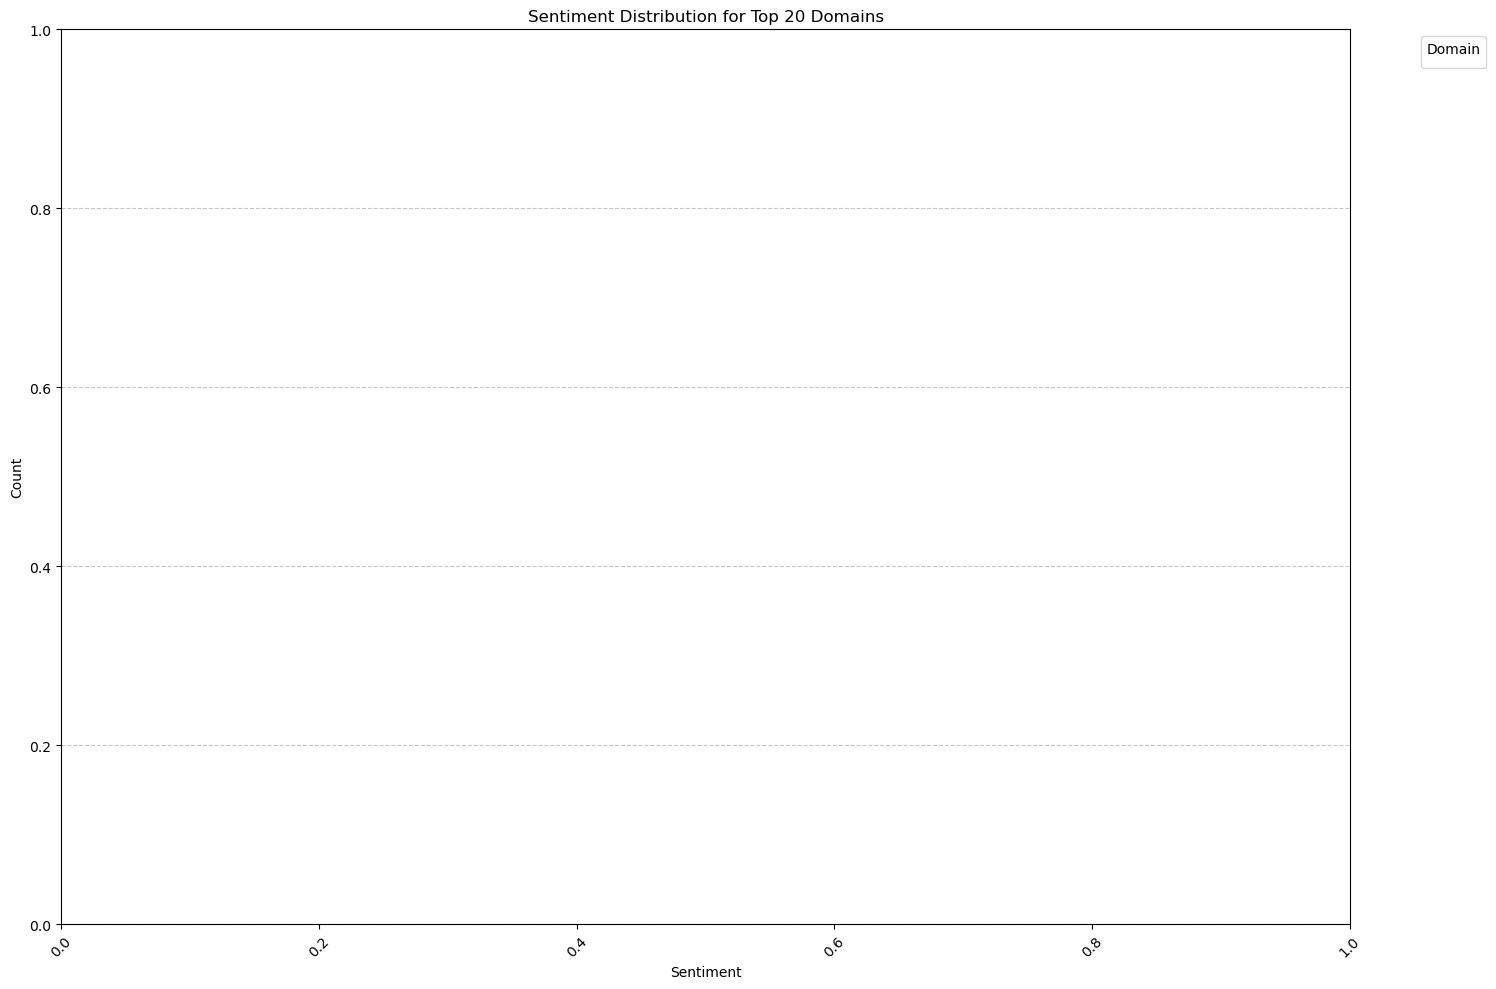

In [88]:
# Get the top 20 domains by number of visitors (using 'GlobalRank')
top_domains = final_df[['Domain', 'GlobalRank']].dropna().drop_duplicates()
top_domains = top_domains.sort_values(by='GlobalRank').head(20)['Domain']

# Filter the final_df for these top 20 domains
top_domains_df = final_df[final_df['Domain'].isin(top_domains)]

# Group by domain and calculate sentiment counts
domain_sentiment_counts = top_domains_df.groupby('Domain')['title_sentiment'].value_counts().unstack(fill_value=0)

# Plot the sentiment distribution for each top domain
plt.figure(figsize=(15, 10))

# Plot each domain's sentiment distribution
for domain in top_domains:
    if domain in domain_sentiment_counts.index:
        sentiment_counts = domain_sentiment_counts.loc[domain]
        plt.bar(sentiment_counts.index + ' (' + domain + ')', sentiment_counts, label=domain)

plt.title("Sentiment Distribution for Top 20 Domains")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Compare Content Metadata Across Sites

In [90]:
# Descriptive statistics for content length, title length, and description length
metadata_stats = final_df.groupby('source_name').agg({
    'title_length': ['mean', 'std', 'min', 'max'],
    'description_length': ['mean', 'std', 'min', 'max'],
    'content_length': ['mean', 'std', 'min', 'max']
})

print("Content metadata statistics across sites:")
print(metadata_stats)


Content metadata statistics across sites:
                             title_length                     description_length                      content_length                     
                                     mean        std min  max               mean        std  min  max           mean        std  min  max
source_name                                                                                                                              
ABC News                        84.515549  13.567993  25  120         151.160350  48.986952    1  260     213.101069   6.740664  101  215
Al Jazeera English              64.235577  10.193959  13   75         107.309495  13.703799   19  121     212.943510   4.104519  124  215
AllAfrica - Top Africa News     63.700000  15.427590  37   95         165.000000  54.563338   82  260     213.350000   0.587143  212  214
Android Central                 67.750958  14.620708  23  115         132.720307  34.067483   72  260     213.961686   0.423027  2

Similarity of Raw Message Lengths Across Sites

<Figure size 1400x700 with 0 Axes>

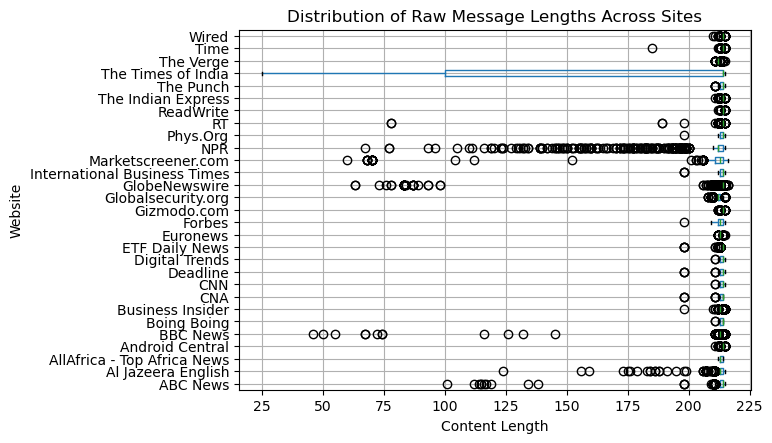

In [91]:
# Boxplot for content lengths
plt.figure(figsize=(14, 7))
final_df.boxplot(column='content_length', by='source_name', vert=False)
plt.title('Distribution of Raw Message Lengths Across Sites')
plt.suptitle('')
plt.xlabel('Content Length')
plt.ylabel('Website')
plt.show()


Similarity of Number of Words in the Title Across Sites

<Figure size 1400x700 with 0 Axes>

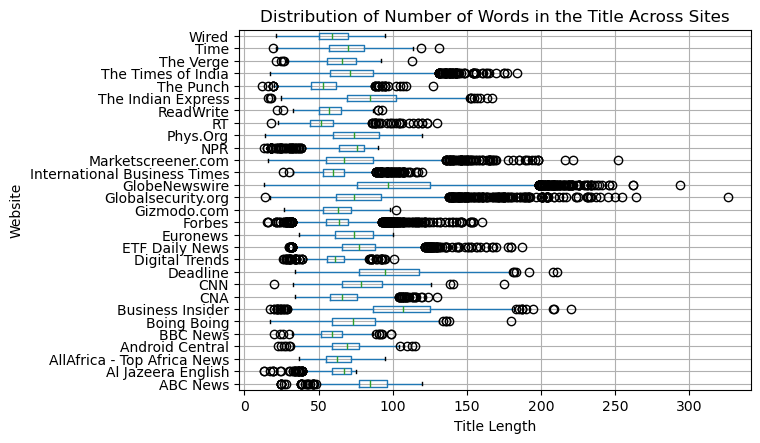

In [92]:
# Boxplot for title lengths
plt.figure(figsize=(14, 7))
final_df.boxplot(column='title_length', by='source_name', vert=False)
plt.title('Distribution of Number of Words in the Title Across Sites')
plt.suptitle('')
plt.xlabel('Title Length')
plt.ylabel('Website')
plt.show()


Impact of Frequent News Reporting and Sentiment on Global Ranking

In [94]:
# Calculate mean sentiment and total reports per website
website_stats = data_df.groupby('source_name').agg({
    'title_sentiment': 'mean',
    'content_length': 'count'
}).rename(columns={'title_sentiment': 'mean_sentiment', 'content_length': 'total_reports'})

# Merge with traffic data
website_stats = website_stats.merge(traffic_data_df[['Domain', 'GlobalRank']], left_on='source_name', right_on='Domain')

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(website_stats['total_reports'], website_stats['GlobalRank'], c=website_stats['mean_sentiment'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Average Sentiment')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')
plt.title('Impact of News Reporting and Sentiment on Global Ranking')
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

Splitting the Data